In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd /content/drive/MyDrive/TGP-2-MDIK

In [ ]:
# ⬇️ Install PySpark untuk simulasi Spark
!pip install pyspark

# ⬇️ Install DuckDB untuk simulasi data warehouse
!pip install duckdb

# ⬇️ Install text processing & sentiment
!pip install textblob
!python -m textblob.download_corpora

# (Opsional) Untuk model transformer-based sentiment
# !pip install transformers

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
import pandas as pd
import time

# Simulasi data review
reviews = ["This course was great!", "Too basic", "Very informative!", "Not what I expected"]

for review in reviews:
    print(f"Ingesting review: {review}")
    # Simulasi delay seperti stream
    time.sleep(1)

Ingesting review: This course was great!
Ingesting review: Too basic
Ingesting review: Very informative!
Ingesting review: Not what I expected


In [ ]:
from pyspark.sql import SparkSession

# Membuat Spark session
spark = SparkSession.builder.appName("TestSpark").getOrCreate()

# Data dummy
data = [("Machine Learning", 4.5), ("Python Basics", 4.2)]
df = spark.createDataFrame(data, ["Course", "Rating"])

df.show()
df.filter("Rating > 4.3").show()

+----------------+------+
|          Course|Rating|
+----------------+------+
|Machine Learning|   4.5|
|   Python Basics|   4.2|
+----------------+------+

+----------------+------+
|          Course|Rating|
+----------------+------+
|Machine Learning|   4.5|
+----------------+------+



In [ ]:
import duckdb
import pandas as pd

# Dataset dummy
df = pd.DataFrame({
    "course": ["ML", "Python", "SQL"],
    "rating": [4.5, 4.1, 3.8]
})

# Query
result = duckdb.query("SELECT * FROM df WHERE rating > 4.0").to_df()
result

,course,rating
0,ML,4.5
1,Python,4.1


from matplotlib import pyplot as plt
_df_10['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('course').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='index', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('course')):
  _plot_series(series, series_name, i)
  fig.legend(title='course', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('course')):
  _plot_series(series, series_name, i)
  fig.legend(title='course', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['course'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='course', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['course'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='rating', y='course', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

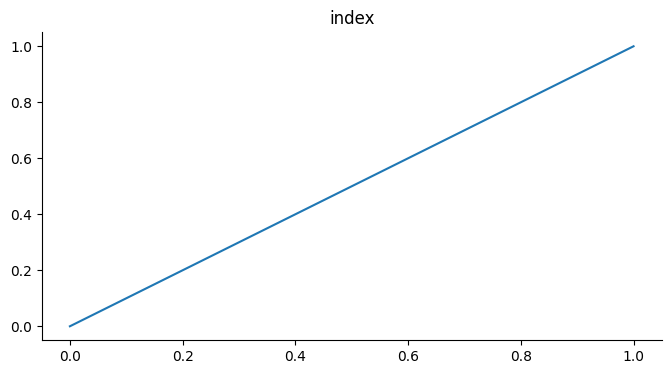

In [ ]:
from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd

# Path dataset
path_coursera = '/content/drive/MyDrive/TGP-2-MDIK/coursea_data.csv'
path_edx = '/content/drive/MyDrive/TGP-2-MDIK/EdX.csv'

# Ingestion dari CSV
df_coursera = pd.read_csv(path_coursera)
df_edx = pd.read_csv(path_edx)

# Tampilkan contoh isi
df_coursera.head(), df_edx.head()

(   Unnamed: 0                                       course_title  \
 0         134  (ISC)² Systems Security Certified Practitioner...   
 1         743  A Crash Course in Causality:  Inferring Causal...   
 2         874                     A Crash Course in Data Science   
 3         413                            A Law Student's Toolkit   
 4         635                A Life of Happiness and Fulfillment   
 
           course_organization course_Certificate_type  course_rating  \
 0                      (ISC)²          SPECIALIZATION            4.7   
 1  University of Pennsylvania                  COURSE            4.7   
 2    Johns Hopkins University                  COURSE            4.5   
 3             Yale University                  COURSE            4.7   
 4   Indian School of Business                  COURSE            4.8   
 
   course_difficulty course_students_enrolled  
 0          Beginner                     5.3k  
 1      Intermediate                      17k  


In [ ]:
import os

# Simulasi lakehouse folder
lakehouse_path = '/content/drive/MyDrive/TGP-2-MDIK/data_lake'
bronze_path = f'{lakehouse_path}/bronze'
silver_path = f'{lakehouse_path}/silver'
gold_path = f'{lakehouse_path}/gold'

# Buat direktori
os.makedirs(bronze_path, exist_ok=True)
os.makedirs(silver_path, exist_ok=True)
os.makedirs(gold_path, exist_ok=True)

In [ ]:
# Simpan data mentah
df_coursera.to_csv(f'{bronze_path}/coursea_raw.csv', index=False)
df_edx.to_csv(f'{bronze_path}/edx_raw.csv', index=False)

In [ ]:
!pip install pyspark duckdb

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("TransformasiDataEdxCoursera") \
    .getOrCreate()

In [ ]:
# Baca file dari path upload
df_coursera = spark.read.option("header", True).csv("/content/drive/MyDrive/TGP-2-MDIK/data_lake/bronze/coursea_raw.csv")
df_edx = spark.read.option("header", True).csv("/content/drive/MyDrive/TGP-2-MDIK/data_lake/bronze/edx_raw.csv")

# Tampilkan 5 baris pertama
df_coursera.show(5)
df_edx.show(5)

+----------+--------------------+--------------------+-----------------------+-------------+-----------------+------------------------+
|Unnamed: 0|        course_title| course_organization|course_Certificate_type|course_rating|course_difficulty|course_students_enrolled|
+----------+--------------------+--------------------+-----------------------+-------------+-----------------+------------------------+
|       134|(ISC)² Systems Se...|              (ISC)²|         SPECIALIZATION|          4.7|         Beginner|                    5.3k|
|       743|A Crash Course in...|University of Pen...|                 COURSE|          4.7|     Intermediate|                     17k|
|       874|A Crash Course in...|Johns Hopkins Uni...|                 COURSE|          4.5|            Mixed|                    130k|
|       413|A Law Student's T...|     Yale University|                 COURSE|          4.7|            Mixed|                     91k|
|       635|A Life of Happine...|Indian School o

In [ ]:
# 1. Cleaning
df_coursera_cleaned = df_coursera.dropna(subset=["course_title", "course_rating"])
df_edx_cleaned = df_edx.dropna(subset=["Name", "Course Description"])

# 2. Konversi rating (dari Coursera) ke float
from pyspark.sql.functions import col
df_coursera_cleaned = df_coursera_cleaned.withColumn("course_rating", col("course_rating").cast("float"))

# 3. Rename kolom untuk join
df_coursera_cleaned = df_coursera_cleaned.withColumnRenamed("course_title", "Course_Title")
df_edx_cleaned = df_edx_cleaned.withColumnRenamed("Name", "Course_Title")

# 4. Join antar dataset berdasarkan Course_Title
df_joined = df_coursera_cleaned.join(df_edx_cleaned, on="Course_Title", how="inner")

# 5. Tampilkan hasil join
df_joined.select("Course_Title", "course_rating", "Course Description").show(5, truncate=False)


+-------------------------------------------------------+-------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from pyspark.sql.functions import avg

# Hitung rata-rata rating per Course
df_avg_rating = df_joined.groupBy("Course_Title").agg(avg("course_rating").alias("Average_Rating"))
df_avg_rating.show(5)

+--------------------+-----------------+
|        Course_Title|   Average_Rating|
+--------------------+-----------------+
|Introduction to C...|4.599999904632568|
|Strategic Management|4.699999809265137|
|    Machine Learning|             4.75|
|Introduction to C...|4.599999904632568|
|International Wom...|4.900000095367432|
+--------------------+-----------------+
only showing top 5 rows



In [ ]:
import duckdb

# Konversi ke pandas sebelum simpan ke DuckDB
df_result = df_joined.select("Course_Title", "course_rating", "Course Description").toPandas()

# Simpan ke DuckDB
conn = duckdb.connect("/content/drive/MyDrive/TGP-2-MDIK/data_lake/gold/final_course_sentiment.duckdb")

# Register dataframe dan simpan sebagai table
conn.register("df_result", df_result)
conn.execute("CREATE TABLE IF NOT EXISTS course_sentiment AS SELECT * FROM df_result")

# Contoh query analisis di DuckDB
conn.execute("""
    SELECT Course_Title, COUNT(*) AS ReviewCount
    FROM course_sentiment
    GROUP BY Course_Title
    ORDER BY ReviewCount DESC
    LIMIT 5""").df()

,Course_Title,ReviewCount
0,Machine Learning,2
1,Introduction to Probability and Data,2
2,Introduction to Marketing,2
3,International Women's Health and Human Rights,1
4,Anatomy: Musculoskeletal and Integumentary Sys...,1


In [ ]:
!pip install rapidfuzz duckdb
import pandas as pd
from rapidfuzz import process, fuzz
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load CSV dari Google Drive
df_coursera = pd.read_csv('/content/drive/MyDrive/TGP-2-MDIK/coursea_data.csv')
df_edx = pd.read_csv('/content/drive/MyDrive/TGP-2-MDIK/EdX.csv')

# Cleaning data null
df_coursera_cleaned = df_coursera.dropna(subset=['course_title', 'course_rating'])
df_edx_cleaned = df_edx.dropna(subset=['Name', 'Course Description'])

# Rename kolom agar konsisten
df_coursera_cleaned = df_coursera_cleaned.rename(columns={'course_title': 'Course_Title'})
df_edx_cleaned = df_edx_cleaned.rename(columns={'Name': 'Course_Title'})


In [ ]:
def fuzzy_match_course(course_title, choices, threshold=85):
    match = process.extractOne(course_title, choices, scorer=fuzz.token_sort_ratio)
    if match and match[1] >= threshold:
        return match[0]
    else:
        return None

# Daftar judul dari EdX untuk dicocokkan
edx_titles = df_edx_cleaned['Course_Title'].tolist()

# Tambahkan kolom hasil match fuzzy
df_coursera_cleaned['Matched_Title'] = df_coursera_cleaned['Course_Title'].apply(
    lambda x: fuzzy_match_course(x, edx_titles, threshold=85)
)

# Ambil hanya baris yang berhasil dicocokkan
df_coursera_matched = df_coursera_cleaned.dropna(subset=['Matched_Title'])

# Merge hasil fuzzy match
df_joined = pd.merge(
    df_coursera_matched,
    df_edx_cleaned,
    left_on='Matched_Title',
    right_on='Course_Title',
    suffixes=('_coursera', '_edx')
)

# Pilih kolom penting untuk analisis
df_joined = df_joined[['Course_Title_coursera', 'course_rating', 'Course Description']]
df_joined = df_joined.rename(columns={'Course_Title_coursera': 'Course_Title'})


In [ ]:
# Simpan ke DuckDB
conn = duckdb.connect('/content/drive/MyDrive/TGP-2-MDIK/data_lake/gold/final_course_sentiment.duckdb')
conn.register("df_result", df_joined)
conn.execute("CREATE OR REPLACE TABLE course_sentiment AS SELECT * FROM df_result")

# Simpan ke CSV untuk Tableau
df_joined.to_csv('/content/drive/MyDrive/TGP-2-MDIK/data_lake/gold/course_sentiment.csv', index=False)


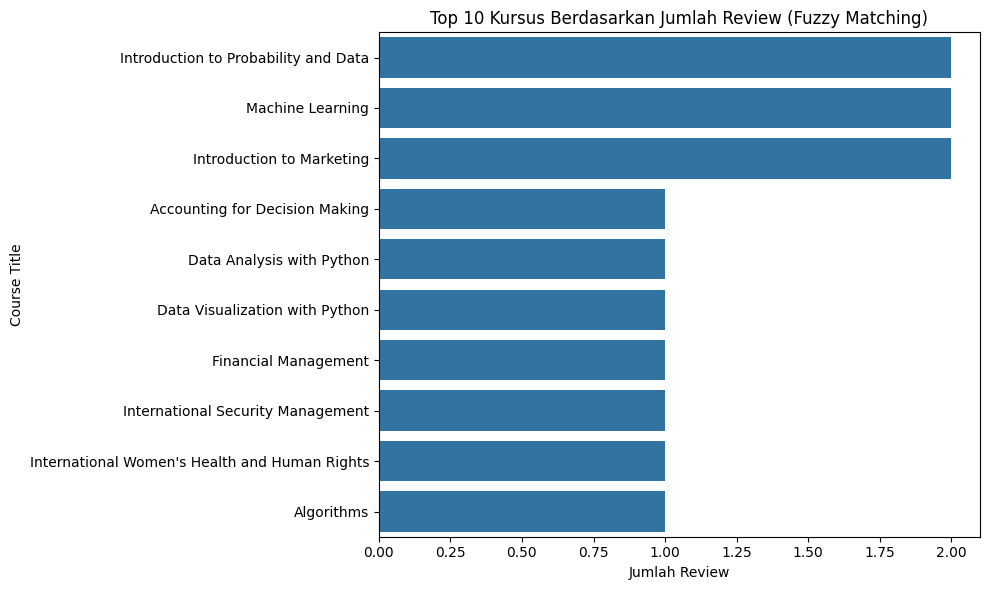

In [ ]:
df_top_reviews = df_joined.groupby('Course_Title').size().reset_index(name='ReviewCount')
df_top_reviews = df_top_reviews.sort_values('ReviewCount', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='Course_Title', x='ReviewCount', data=df_top_reviews)
plt.title("Top 10 Kursus Berdasarkan Jumlah Review (Fuzzy Matching)")
plt.xlabel("Jumlah Review")
plt.ylabel("Course Title")
plt.tight_layout()
plt.show()


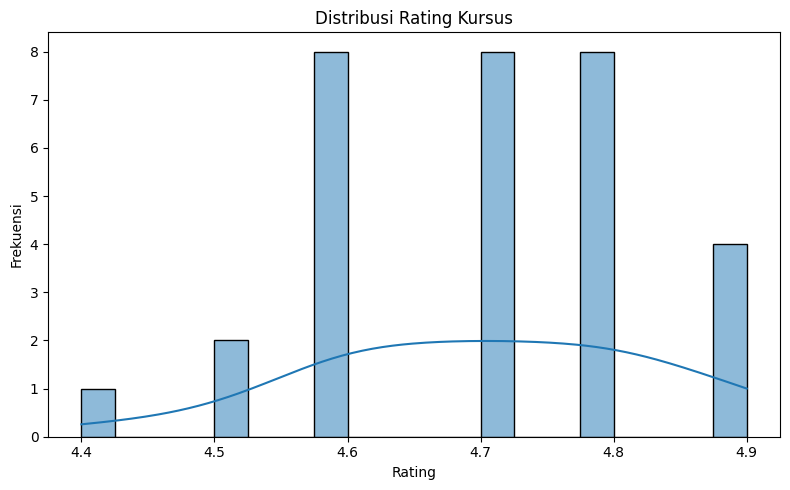

In [ ]:
df_joined['course_rating'] = pd.to_numeric(df_joined['course_rating'], errors='coerce')

plt.figure(figsize=(8,5))
sns.histplot(df_joined['course_rating'].dropna(), bins=20, kde=True)
plt.title("Distribusi Rating Kursus")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()


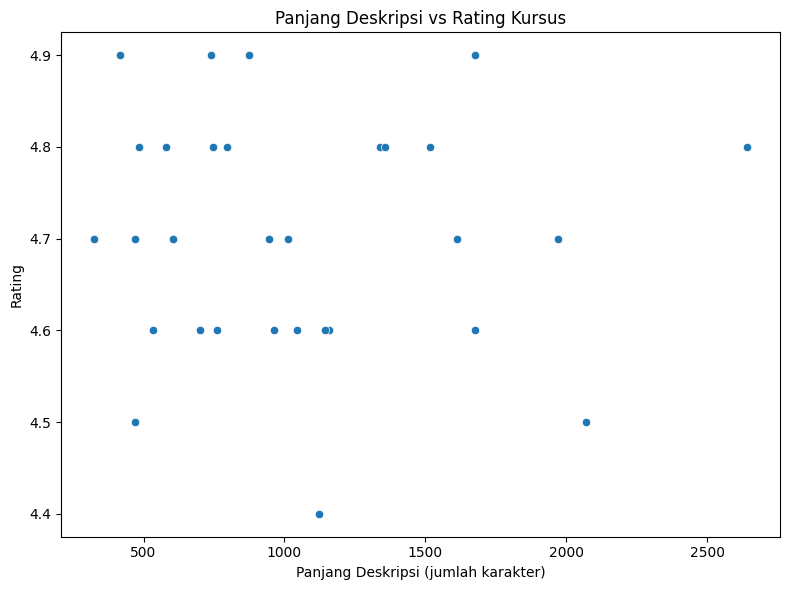

In [ ]:
df_joined['ReviewLength'] = df_joined['Course Description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8,6))
sns.scatterplot(x='ReviewLength', y='course_rating', data=df_joined)
plt.title("Panjang Deskripsi vs Rating Kursus")
plt.xlabel("Panjang Deskripsi (jumlah karakter)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


In [ ]:
def rating_category(rating):
    if rating >= 4.5:
        return "Excellent"
    elif rating >= 4.0:
        return "Good"
    elif rating >= 3.5:
        return "Average"
    else:
        return "Low"

df_joined['RatingCategory'] = df_joined['course_rating'].apply(rating_category)


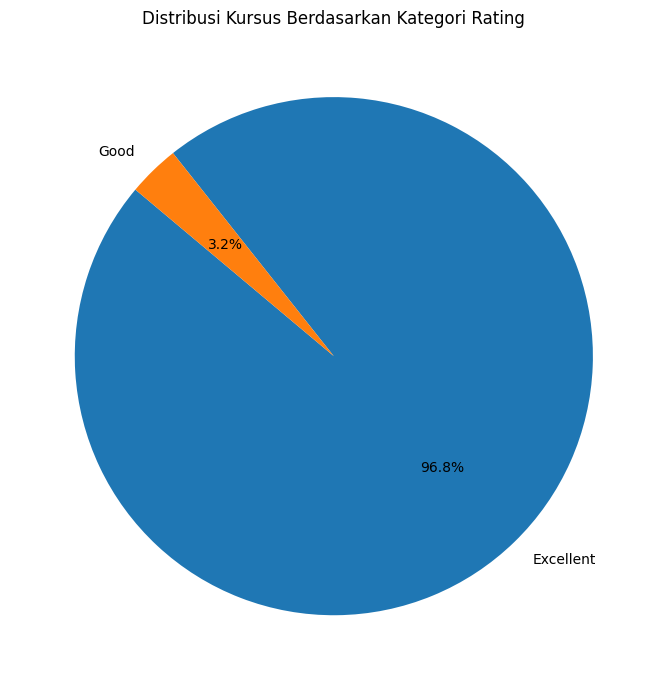

In [ ]:
category_counts = df_joined['RatingCategory'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Kursus Berdasarkan Kategori Rating")
plt.tight_layout()
plt.show()


In [80]:
# SparkSession sudah dibuat sebelumnya
df_coursera_spark = spark.read.option("header", True).csv('/content/drive/MyDrive/TGP-2-MDIK/coursea_data.csv')
df_edx_spark = spark.read.option("header", True).csv('/content/drive/MyDrive/TGP-2-MDIK/EdX.csv')

# Drop NA & rename kolom
from pyspark.sql.functions import col
df_coursera_spark = df_coursera_spark.dropna(subset=["course_title", "course_rating"]) \
    .withColumnRenamed("course_title", "Course_Title")
df_edx_spark = df_edx_spark.dropna(subset=["Name", "Course Description"]) \
    .withColumnRenamed("Name", "Course_Title")

# Konversi tipe data
df_coursera_spark = df_coursera_spark.withColumn("course_rating", col("course_rating").cast("float"))

# Join Spark
df_joined_spark = df_coursera_spark.join(df_edx_spark, on="Course_Title", how="inner")

# Lanjutkan print
print("Baris dari join Spark inner:", df_joined_spark.count())



Baris dari join Spark inner: 17


In [81]:
print("Baris hasil fuzzy join:", df_joined.shape[0])


Baris hasil fuzzy join: 31
